In [ ]:
# Visualizing the plot
import matplotlib.pyplot as plt
import seaborn as sns

sns.regplot(x='n_claims', y='total_payement_sek', data=swedish_motor_insurance, ci=None)
plt.show()

In [ ]:
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
# price_twd_msq as the response variable and n_convenience as the explanatory variable
mdl_price_vs_conv = ols(formula='price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

In [ ]:
# Visualizing 1 numeric and 1 categorical variable
import matplotlib.pyplot as plt
import seaborn as sns

sns.displot(data=fish, x='mass_g', col='species', col_wraps=2, bins=9)
plt.show()

# Mean mass by species
summary_stats = fish.groupby('species')['mass_g'].mean()
print(summary_stats)

In [ ]:
# Linear regression
from statsmodels.formula.api import ols
mdl_mass_vs_species = ols('mass_g ~ species', data=fish).fit()
print(mdl_mass_vs_species.params)

# Without an intercept
mdl_mass_vs_species = ols('mass_g ~ species + 0', data=fish).fit()
print(mdl_mass_vs_species.params)

In [ ]:
# Running the model
import numpy as np
import pandas as pd
mdl_mass_vs_length = ols('mass_g ~ length_cm', data=bream).fit()
print(mdl_mass_vs_length.params)

explanatory_data = pd.DataFrame({'length_cm':np.arange(20, 41)})
print(mdl_mass_vs_length.predict(explanatory_data))

# Predicting inside a DataFrame
explanatory_data = pd.DataFrame({'length_cm':np.arange(20, 41)})
predicton_data = explanatory_data.assign(mass_g=mdl_mass_vs_length.predict(explanatory_data))
print(predicton_data)

# Showing predictions
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g', ci=None, data=bream)
sns.scatterplot(x='length_cm', y='mass_g', data=prediction_data, color='red', marker='s')
plt.show()

# Extrapolating 
little_bream = pd.DataFrame({'length_cm': [10]})
pred_little_bream = little_bream.assign(mass_g=ml_mass_vs_length.predict(little_bream))
print(pred_little_bream)

In [ ]:
from statsmodels.formula.api import ols
mdl_mass_vs_length = ols('mass_g ~ length_cm', data=bream).fit()
print(mdl_mass_vs_length.params)

# .fittedvalues attribute(used to create models)
print(mdl_mass_vs_length.fittedvalues)
# or
explanatory_data = bream['length_cm']
print(mdl_mass_vs_length.predict(explanatory_data))

# .resid attribute(measure of inaccuracy in model fit)
print(mdl_mass_vs_length.resid)
# or (Actual response value-predicted response value)
print(bream['mass_g'] - mdl_mass_vs_length.fittedvalues)

# .summary()
mdl_mass_vs_length.summary()

In [ ]:
# Regression to the mean
fig = plt.figure()
sns.scatterplot(x='father_height_cm', y='son_height_cm', data=father_son)
plt.axline(xy1=(150, 150), slope=1, linewidth=2, color='green')
plt.axis('equal')   # x-axis appears the same as one centimeter on y-axis
plt.show()

# Adding regression line
fig = plt.figure()
sns.regplot(x='father_height_cm', y='son_height_cm', data=father_son, ci=None, line_kws={'color': 'black'})
plt.axline(xy1=(150, 150), slope=1, linewidth=2, color='green')
plt.axis('equal')
plt.show()

# Running a regression
mdl_son_vs_father = ols('son_height_cm ~ father_height_cm', data=father.son).fit()
print(mdl_son_vs_father.params)

# Making predictions
really_tall_father = pd.DataFrame({'father_height_cm': [190]})
mdl_son_vs_father.predict(really_tall_father)

really_short_father = pd.DataFrame({'father_height_cm': [150]})
mdl_son_vs_father.predict(really_short_father)

In [ ]:
# Transforming variables
# Plotting mass vs. length cubed
perch['length_cm_cubed'] = perch['length_cm'] ** 3
sns.regplot(x='length_cm_cubed', y='mass_g', data=perch, ci=None)
plt.show()

mdl_perch = ols('mass_g ~ length_cm_cubed', data=perch).fit()
mdl_perch.params

explanatory_data = pd.DataFrame({'length_cm_cubed': np.arange(10, 41, 5) ** 3, 'length_cm':np.arange(10, 41, 5)})

prediction_data = explanatory_data.assign(mass_g=mdl_perch.predict(explanatory_data))
print(prediction_data)

fig = plt.figure()
sns.regplot(x='length_cm_cubed', y='mass_g', data=perch, ci=None)
sns.scatterplot(data=prediction_data, x='length_cm_cubed', y='mass_g', color='red', marker='s')

fig = plt.figure()
sns.regplot(x='length_cm', y='mass_g', data=perch, ci=None)
sns.scatterplot(data=prediction_data, y='mass_g', x='length_cm', color='red', marker='s')


In [ ]:
# .mse_resid attribute
mse = mdl_bream.mse_resid
print('mse: ', mse)

rse = np.sqrt(mse)
print('rse: ', rse)

# calculating RSE: sum of residuals squared
residuals_sq = mdl_bream.resid ** 2
resid_sum_of_sq = sum(residuals_sq)
print('resid sum of sq :', resid_sum_of_sq)

# degrees of freedom
residuals_sq = mdl_bream.resid ** 2
resid_sum_of_sq = sum(residuals_sq)
deg_freedom = len(bream.index) - 2
print('deg freedom: ',deg_freedom)

# root-mean-square error(RMSE)
residuals_sq = mdl_bream.resid ** 2
resid_sum_of_sq = sum(residuals_sq)
n_obs = len(bream.index)
rmse = np.sqrt(resid_sum_of_sq/n_obs)
print('rmse :', rmse)

In [ ]:
sns.residplot(x='length_cm', y='mass_g', data=bream, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')

# qqplot()
from statsmodels.api import qqplot
qqplot(data=mdl_bream.resid, fit=True, line='45')

In [ ]:
# Scale-location plot
model_norm_residuals_bream = mdl_bream.get_influence().resid_studentized.internal
model_norm_residuals_abs_bream = np.sqrt(np.abs(model_norm_residuals_bream))
sns.regplot(x=mdl_bream.fittedvalues, y=model_norm_residuals_abs_bream, ci=None, lowess=True)
plt.xlabel('Fitted values')
plt.ylabel('Sqrt of abs val of stdized residuals')

In [ ]:
# .get_influence() and .summary_frame()
mdl_roach = ols('mass_g ~ length_cm', data=roach).fit()
summary_roach = mdl_roach.get_influence().summary_frame()
roach['leverage'] = summary_roach['hat_diag']

print(roach.head())

# Cook's distance
roach['cooks_dist'] = summary_roach['cooks_d']
print(roach.head())

# Most influential roaches
print(raoch.sort_values('cooks_dict', ascending=False))

# Removing the most influential roach
roach_not_short = roach[roach['length_cm'] != 12.9]

sns.regplot(x='length_cm', y='mass_g', data=roach, ci=None, line_kws={'color':'green'})
sns.regplot(x='length_cm', y='mass_g', data=roach_not_short, ci=None, line_kws={'color':'red'})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=churn)
plt.axline(xy1=(0, intercept), slope=slope)
plt.xlin(-10, 10)
plt.ylin(-0.2, 1.2)
plt.show()

In [1]:
# logistic regression using logit()
import pandas as pd
churn = pd.read_csv('churn.csv')
from statsmodels.formula.api import logit
mdl_churn_vs_recency_logit = logit('has_churned ~ time_since_last_purchase', data=churn).fit()
print(mdl_churn_vs_recency_logit.params)

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64


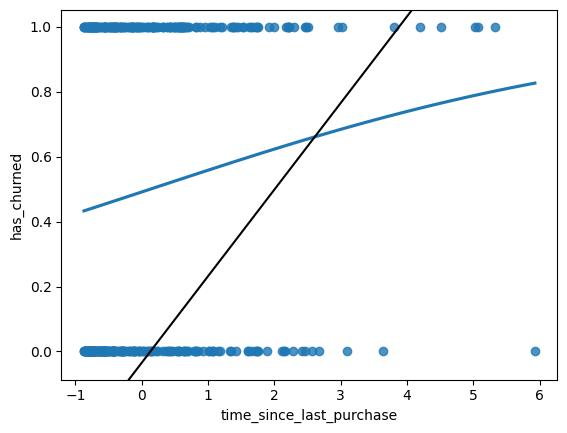

In [8]:
# Visualizing the logistic model
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
churn = pd.read_csv('churn.csv')
X = churn[['time_since_last_purchase']]
y = churn['has_churned']
model = LogisticRegression()
model.fit(X, y)
intercept = model.intercept_[0]
slope = model.coef_[0][0]
sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
plt.axline(xy1=(0,intercept), slope=slope, color='black')
plt.show()

In [11]:
# Making predictions
from statsmodels.formula.api import logit
import numpy as np
mdl_recency = logit('has_churned ~ time_since_last_purchase', data=churn).fit()
explanatory_data = pd.DataFrame({'time_since_last_purchase':np.arange(-1, 6.25, 0.25)})
prediction_data = explanatory_data.assign(has_churned=mdl_recency.predict(explanatory_data))

Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4


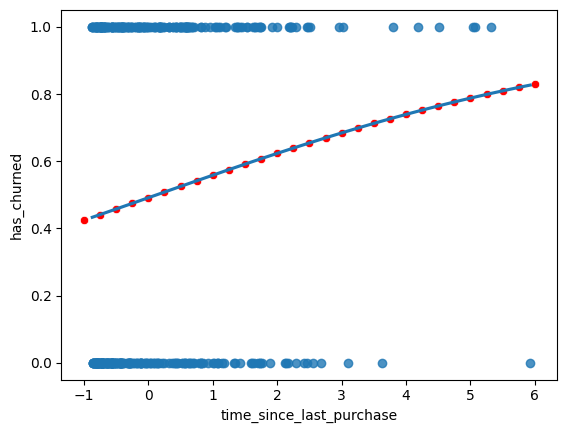

In [12]:
# Adding point predictions
sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
sns.scatterplot(x='time_since_last_purchase', y='has_churned', data=prediction_data, color='red')
plt.show()

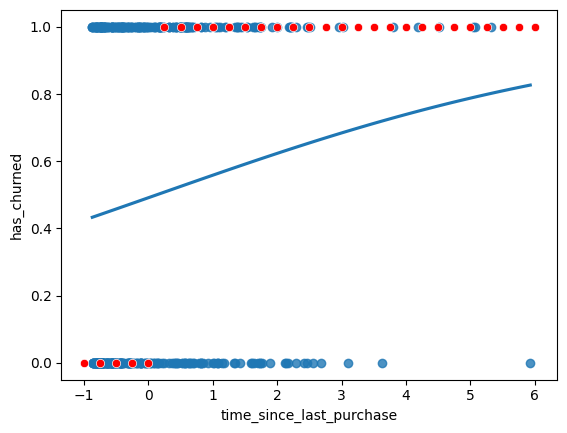

In [16]:
# Getting the most likely outcome
prediction_data = explanatory_data.assign(has_churned=mdl_recency.predict(explanatory_data))
prediction_data['most_likely_outcome'] = np.round(prediction_data['has_churned'])

sns.regplot(x='time_since_last_purchase', y='has_churned', data=churn, ci=None, logistic=True)
sns.scatterplot(x='time_since_last_purchase', y='most_likely_outcome', data=prediction_data, color='red')
plt.show()

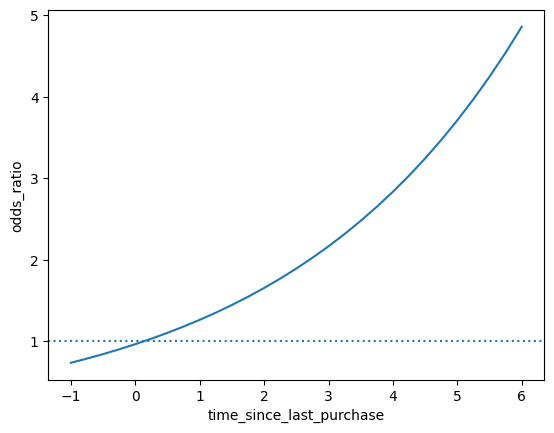

In [18]:
# Calculating odds ratio
prediction_data['odds_ratio'] = prediction_data['has_churned'] / (1-prediction_data['has_churned'])
sns.lineplot(x='time_since_last_purchase', y='odds_ratio', data=prediction_data)
plt.axhline(y=1, linestyle='dotted')
plt.show()

In [19]:
# Calculating log odds ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])


- The true negatives and true positives are on the main diagonal of matrix
- The false negative and false positives are on the second diagonal of matrix

In [23]:
# Confusion matrix
actual_response = churn['has_churned']
predicted_response = np.round(mdl_recency.predict())
outcomes = pd.DataFrame({'actual_response':actual_response, 'predicted_response': predicted_response})
print(outcomes.value_counts(sort=False))

conf_matrix = mdl_recency.pred_table()
print(conf_matrix)

actual_response  predicted_response
0                0.0                   141
                 1.0                    59
1                0.0                   111
                 1.0                    89
Name: count, dtype: int64
[[141.  59.]
 [111.  89.]]


(<Figure size 640x480 with 3 Axes>,
 {('0', '0'): (0.0, 0.0, 0.49751243781094534, 0.70265780730897),
  ('0', '1'): (0.0,
   0.7059800664451826,
   0.49751243781094534,
   0.2940199335548173),
  ('1', '0'): (0.5024875621890548,
   0.0,
   0.49751243781094534,
   0.553156146179402),
  ('1', '1'): (0.5024875621890548,
   0.5564784053156145,
   0.49751243781094534,
   0.4435215946843853)})

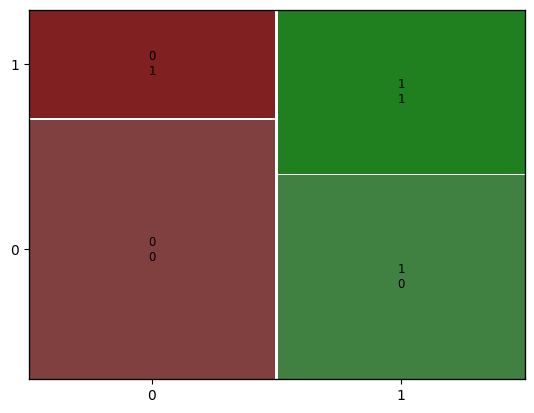

In [24]:
# Using mosaicplot
from statsmodels.graphics.mosaicplot import mosaic
mosaic(conf_matrix)

In [26]:
# Accuracy
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

acc = (TN+TP) / (TN+TP+FN+FP)
print(acc)

0.575


In [28]:
# Sensitivity of true positives
TN = conf_matrix[0, 0]
TP = conf_matrix[1, 1]
FN = conf_matrix[1, 0]
FP = conf_matrix[0, 1]

sens_pos = TP / (FN+TP)
print(sens_pos)

# Sensitivity of true negatives
sens_neg = TN / (TN+FP)
print(sens_neg)

0.445
0.705
